In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pylab as plt

In [2]:
df = pd. read_csv("E:\LiveProject\Hotel_data\csv_data.csv")

In [3]:
df. head()

,S.No.,State,City,Category,Alcohol,Hotel_Name,Address,Start_Date,Expiry_Date,Total_Rooms
0,1,Delhi,New Delhi,1 Star,NaN,Hotel LA (A unit of L A Hotels And Retreats Pv...,"plot no A-1, Community Centre, Road No 43, Man...",20-01-2020,19-01-2025,35
1,2,Gujarat,Adalaj,1 Star,NaN,"Amba Suites, Unit of Amba Township Private Lim...","Amba Business Park, Shivam â€“ II, Sub-Plot No...",15-07-2022,14-07-2027,64
2,3,Gujarat,Ahmedabad,1 Star,NaN,Hotel Pragati The Grand (A Unit of Pragati The...,"SP-2,FP 2342,PAIKI, NR ZYDUS CADILA HOSPITAL,H...",22-09-2021,21-09-2026,45
3,4,Gujarat,Ahmedabad,1 Star,NaN,Hotel Rezaas,"375-1, Sheetal Baug, Nr. Girish Cold Drink, Of...",31-10-2018,30-10-2023,38
4,5,Gujarat,Anand,1 Star,NaN,HOTEL ARIZONA INN,"OPP. S R PARK, ANAND- SOJITRA ROAD, ANAND- 388001",01-09-2020,31-08-2025,28


In [4]:
df. isna(). sum()

S.No.            0
State            0
City             0
Category         0
Alcohol        536
Hotel_Name       0
Address          0
Start_Date       0
Expiry_Date      0
Total_Rooms      0
dtype: int64

In [5]:
df. columns

Index(['S.No.', 'State', 'City', 'Category', 'Alcohol', 'Hotel_Name',
       'Address', 'Start_Date', 'Expiry_Date', 'Total_Rooms'],
      dtype='object')

In [6]:
# Split hotel names to extract 'Hotel LA' portion
df['Hotel_Name'] = df['Hotel_Name'].str.split('(').str[0].str.strip()

In [7]:
df. head()

,S.No.,State,City,Category,Alcohol,Hotel_Name,Address,Start_Date,Expiry_Date,Total_Rooms
0,1,Delhi,New Delhi,1 Star,NaN,Hotel LA,"plot no A-1, Community Centre, Road No 43, Man...",20-01-2020,19-01-2025,35
1,2,Gujarat,Adalaj,1 Star,NaN,"Amba Suites, Unit of Amba Township Private Lim...","Amba Business Park, Shivam â€“ II, Sub-Plot No...",15-07-2022,14-07-2027,64
2,3,Gujarat,Ahmedabad,1 Star,NaN,Hotel Pragati The Grand,"SP-2,FP 2342,PAIKI, NR ZYDUS CADILA HOSPITAL,H...",22-09-2021,21-09-2026,45
3,4,Gujarat,Ahmedabad,1 Star,NaN,Hotel Rezaas,"375-1, Sheetal Baug, Nr. Girish Cold Drink, Of...",31-10-2018,30-10-2023,38
4,5,Gujarat,Anand,1 Star,NaN,HOTEL ARIZONA INN,"OPP. S R PARK, ANAND- SOJITRA ROAD, ANAND- 388001",01-09-2020,31-08-2025,28


In [24]:
df. Category. unique()

array(['1 Star', '2 Star', '3 Star', '4 Star', '5 Star'], dtype=object)

In [19]:
df. Hotel_Name. unique()

array(['Hotel LA', 'Amba Suites, Unit of Amba Township Private Limited',
       'Hotel Pragati The Grand', ...,
       "FORTUNE PARK PUSHPANJALI- MEMBER ITC'S HOTEL GROUP, A Unit of Ganapati India International Pvt. Ltd.",
       'Raajkutir IHCL SeleQtions', 'COURTYARD BY MARRIOTT SILIGURI'],
      dtype=object)

In [20]:
# Group the data by 'Category' and 'Hotel Name', and count the occurrences
category_hotel_counts = df.groupby(['Category', 'Hotel_Name']).size().reset_index(name='Count')

In [21]:
# Sort the counts in descending order for each category
category_hotel_counts_sorted = category_hotel_counts.sort_values(['Category', 'Count'], ascending=[True, False])

In [22]:
# Get the top 10 hotel names for each category
top_10_hotels_by_category = category_hotel_counts_sorted.groupby('Category').head(10)

In [23]:
# Display the top 10 hotel names by category
print(top_10_hotels_by_category)

     Category                                         Hotel_Name  Count
0      1 Star                                          7 Wonders      1
1      1 Star  Amba Suites, Unit of Amba Township Private Lim...      1
2      1 Star                                      Avadh Fun Hub      1
3      1 Star                             Blackbuck Safari Lodge      1
4      1 Star                                       GEN X, SURAT      1
5      1 Star                                  HOTEL APPLE GRAND      1
6      1 Star                                  HOTEL ARIZONA INN      1
7      1 Star                                   HOTEL JAHAJMAHAL      1
8      1 Star                                   HOTEL MANIK MOTI      1
9      1 Star                                           Hotel LA      1
16     2 Star                                    BRG BUDGET STAY      1
17     2 Star                                      COMFORT HOTEL      1
18     2 Star          Club 36, Unit of Vrunda Entertainment LLP

In [26]:
# Iterate over each star category
for star_category in ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']:
    # Filter data for the current star category
    star_category_data = df[df['Category'] == star_category]
    
    # Get the top 10 hotel names for the current star category
    top_10_hotels = star_category_data['Hotel_Name'].value_counts().head(10)
    
    # Display the top hotel names for the current star category
    print(f"Top 10 hotel names for {star_category}:")
    print(top_10_hotels)
    print()

Top 10 hotel names for 1 Star:
Hotel LA                                              1
Amba Suites, Unit of Amba Township Private Limited    1
Hotel Pragati The Grand                               1
Hotel Rezaas                                          1
HOTEL ARIZONA INN                                     1
Blackbuck Safari Lodge                                1
7 Wonders                                             1
Jinanssh Hotels                                       1
Avadh Fun Hub                                         1
The Pinevinta Hotel                                   1
Name: Hotel_Name, dtype: int64

Top 10 hotel names for 2 Star:
HOTEL SHREESH                    1
HARE KRISHNA HOTEL               1
Welcome Spa and Resort           1
HOTEL AIRLINK                    1
Hotel Vrishali Executive         1
JEEVAN AYURVEDIC BEACH RESORT    1
Hotel Marine Palace              1
HOTEL VALLEY OF GODS             1
EFFOTEL BY SAYAJI                1
Rann Riders                    

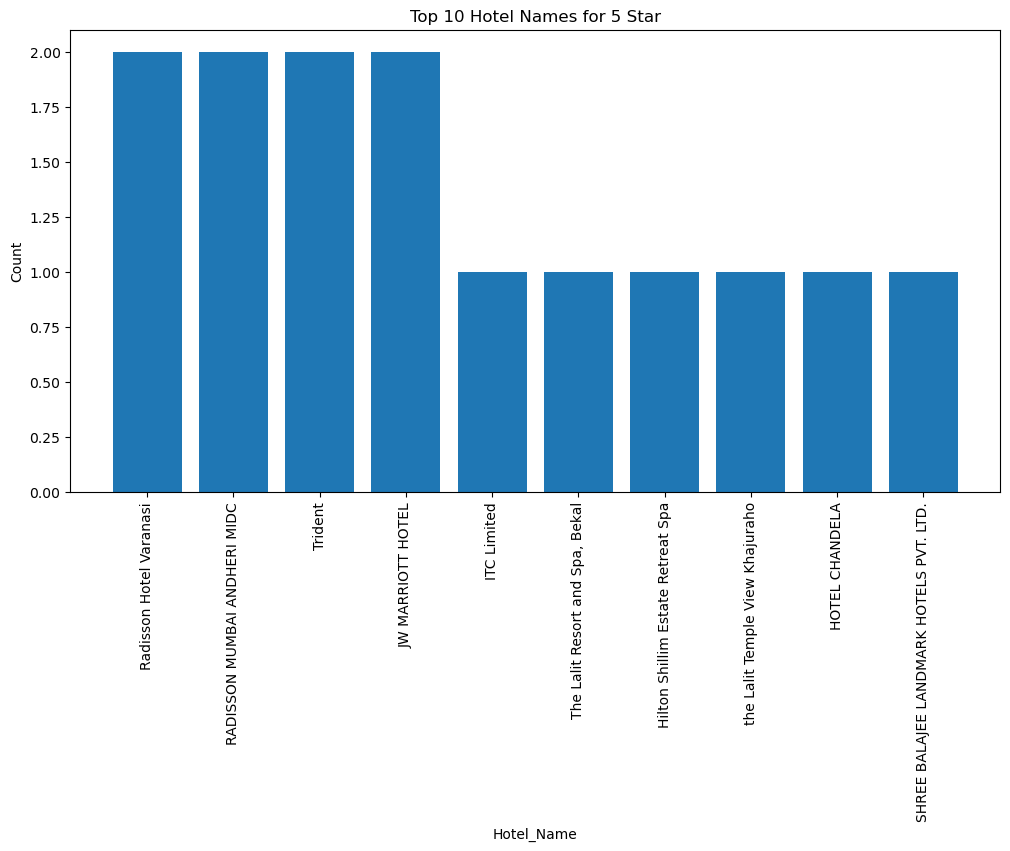

In [28]:
# Create a bar plot for the top hotel names
plt.figure(figsize=(12, 6))
plt.bar(top_10_hotels.index, top_10_hotels.values)
plt.title(f"Top 10 Hotel Names for {star_category}")
plt.xlabel("Hotel_Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [30]:
# Group the data by star category and hotel name, and count the occurrences
star_category_hotel_counts = df.groupby(['Category', 'Hotel_Name']).size().reset_index(name='Count')

# Sort the counts in descending order within each star category
star_category_hotel_counts_sorted = star_category_hotel_counts.sort_values(['Category', 'Count'], ascending=[True, False])

# Get unique star categories
star_categories = star_category_hotel_counts_sorted['Category'].unique()

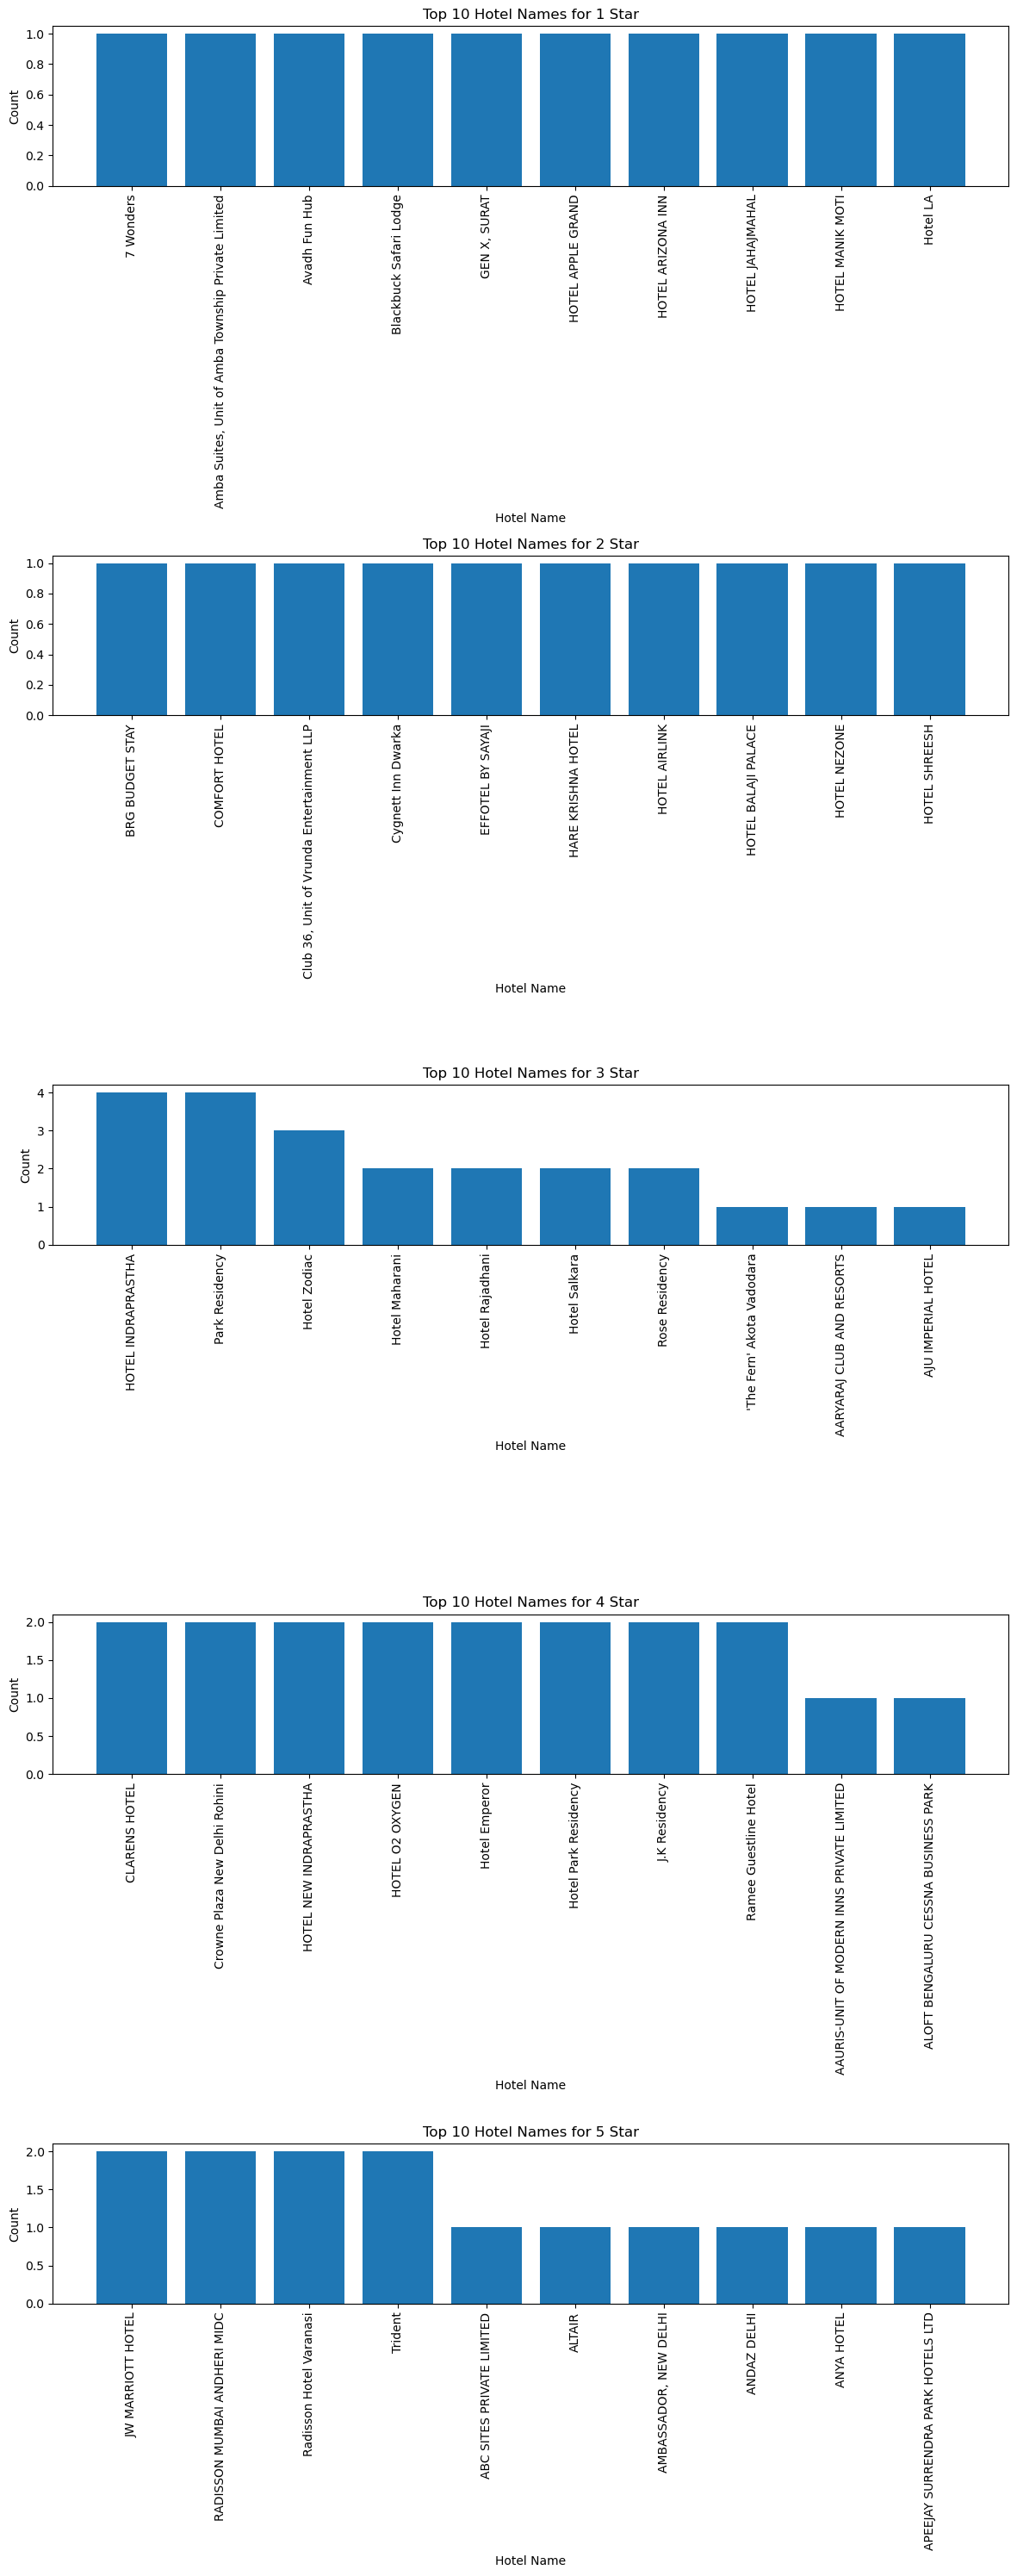

In [32]:
# Create subplots for each star category
fig, axes = plt.subplots(len(star_categories), 1, figsize=(12, 6*len(star_categories)))

# Iterate over each star category and create bar plots
for i, star_category in enumerate(star_categories):
    # Filter data for the current star category
    star_category_data = star_category_hotel_counts_sorted[star_category_hotel_counts_sorted['Category'] == star_category]
    
    # Get the top 10 hotel names for the current star category
    top_10_hotels = star_category_data.head(10)
    
    # Create a bar plot for the top hotel names in the current star category
    ax = axes[i] if len(star_categories) > 1 else axes
    ax.bar(top_10_hotels['Hotel_Name'], top_10_hotels['Count'])
    ax.set_title(f"Top 10 Hotel Names for {star_category}")
    ax.set_xlabel("Hotel Name")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

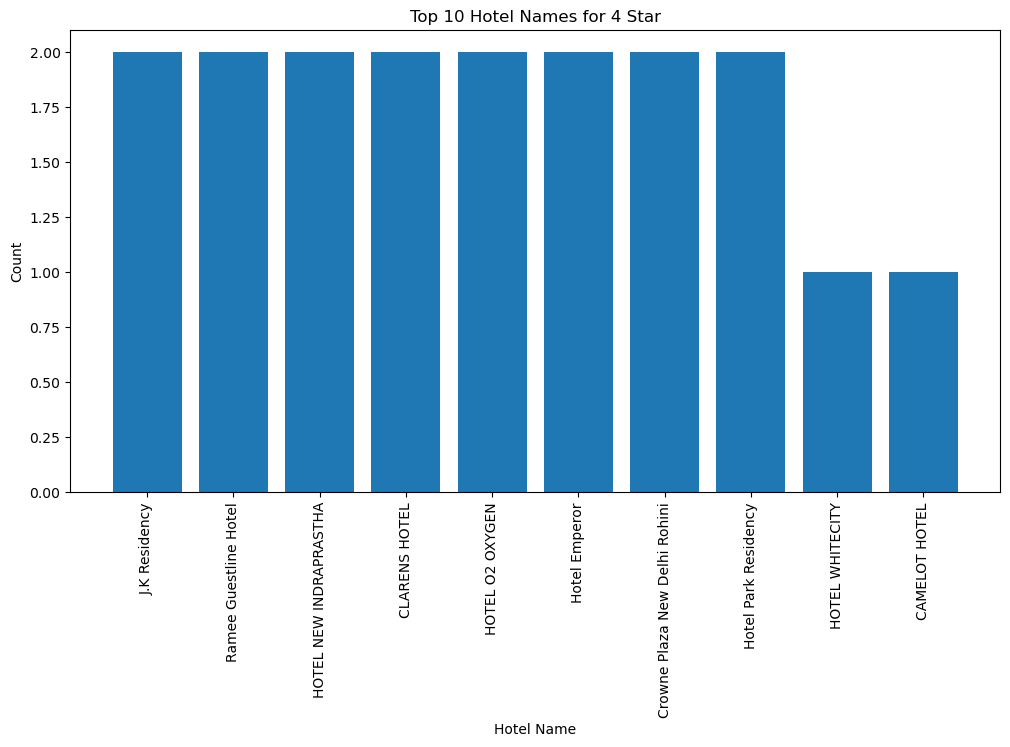

In [34]:
# Filter data for the '4 Star' category
four_star_data = df[df['Category'] == '4 Star']

# Get the top 10 hotel names for the '4 Star' category
top_10_hotels = four_star_data['Hotel_Name'].value_counts().head(10)

# Create a bar plot for the top 10 hotel names in the '4 Star' category
plt.figure(figsize=(12, 6))
plt.bar(top_10_hotels.index, top_10_hotels.values)
plt.title("Top 10 Hotel Names for 4 Star")
plt.xlabel("Hotel Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

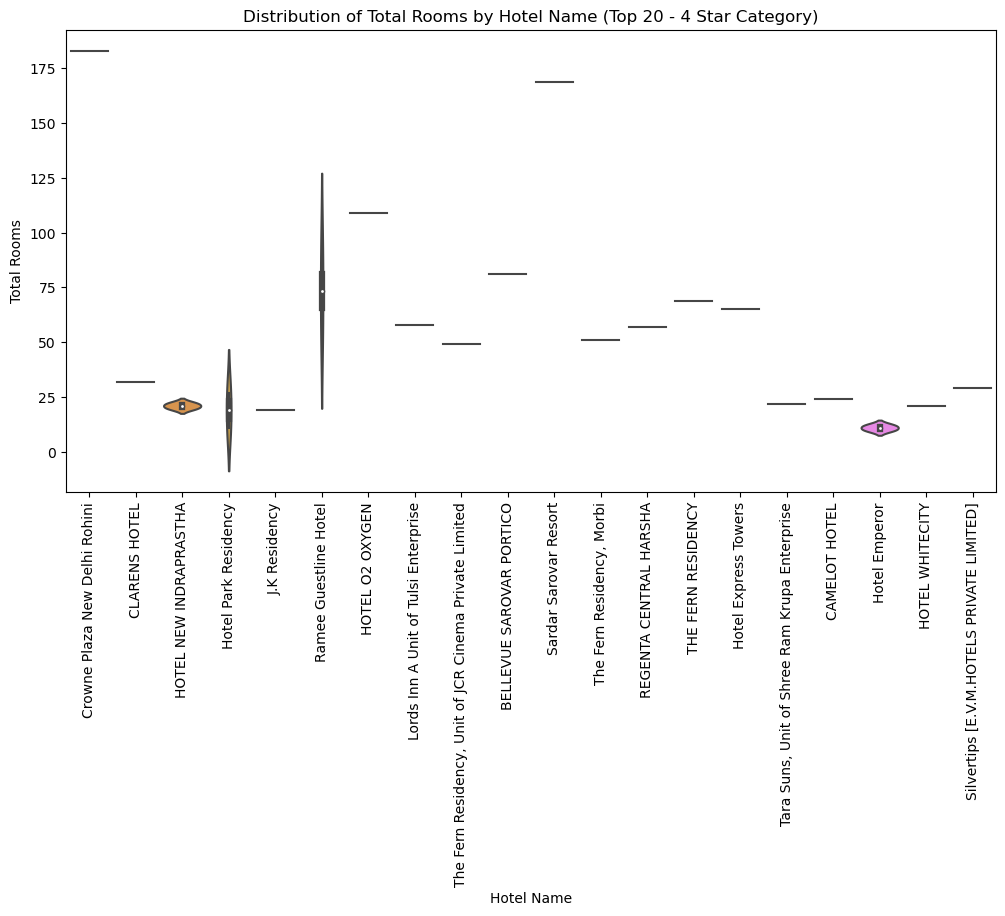

In [49]:
# Filter data for the '4 Star' category
four_star_data = df[df['Category'] == '4 Star']

# Get the top 20 hotel names for the '4 Star' category
top_20_hotels = four_star_data['Hotel_Name'].value_counts().head(20)

# Filter four_star_data based on the top 20 hotel names
four_star_data_top_20 = four_star_data[four_star_data['Hotel_Name'].isin(top_20_hotels.index)]

# Create a violin plot of 'Total Rooms' by 'Hotel Name' for the '4 Star' category (top 20 hotels)
plt.figure(figsize=(12, 6))
sns.violinplot(data=four_star_data_top_20, x='Hotel_Name', y='Total_Rooms')
plt.title('Distribution of Total Rooms by Hotel Name (Top 20 - 4 Star Category)')
plt.xlabel('Hotel Name')
plt.ylabel('Total Rooms')
plt.xticks(rotation=90)
plt.show()

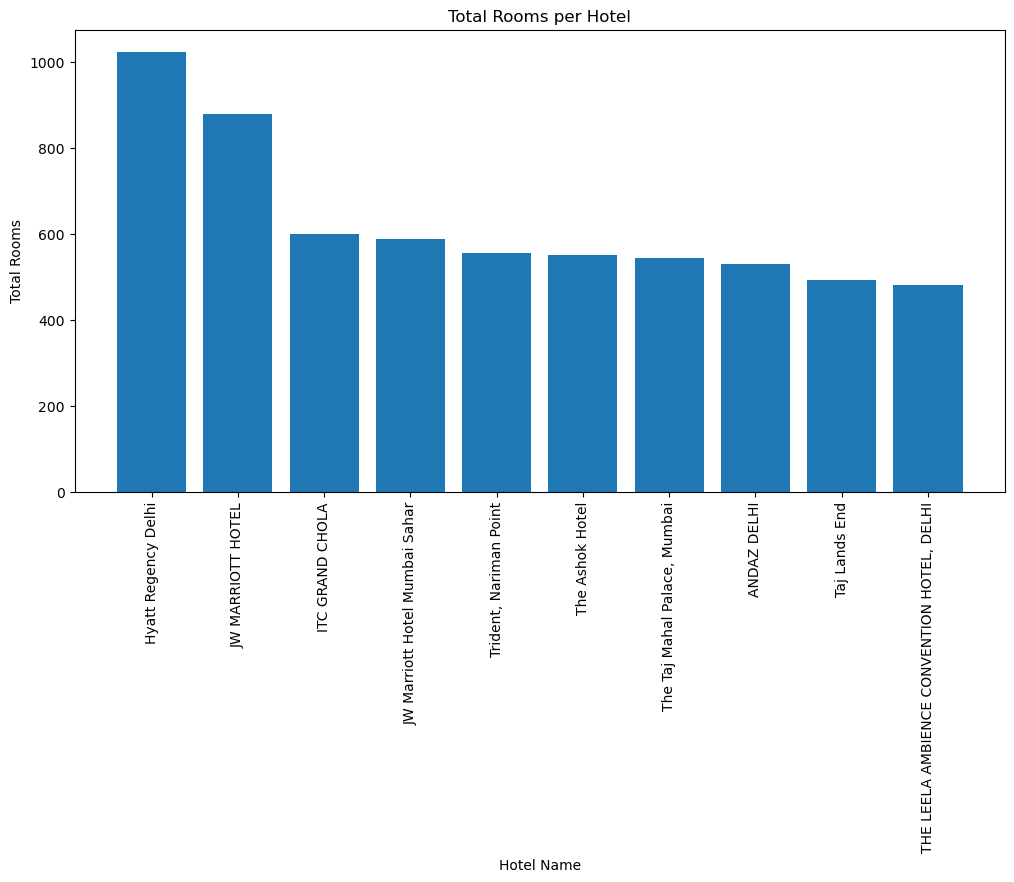

In [35]:
# Group the data by 'Hotel Name' and calculate the sum of 'Total Rooms'
total_rooms_per_hotel = df.groupby('Hotel_Name')['Total_Rooms'].sum()

# Sort the data in descending order of total rooms
total_rooms_per_hotel_sorted = total_rooms_per_hotel.sort_values(ascending=False)

# Get the top 10 hotel names with the highest total rooms
top_10_hotels = total_rooms_per_hotel_sorted.head(10)

# Create a bar plot for the total rooms per hotel
plt.figure(figsize=(12, 6))
plt.bar(top_10_hotels.index, top_10_hotels.values)
plt.title('Total Rooms per Hotel')
plt.xlabel('Hotel Name')
plt.ylabel('Total Rooms')
plt.xticks(rotation=90)
plt.show()

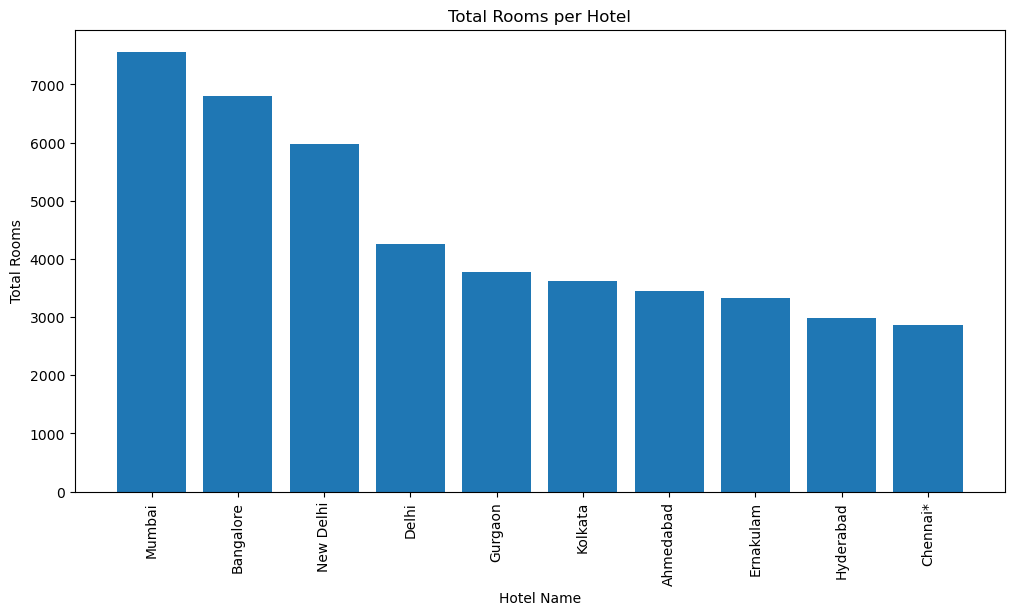

In [43]:
# Group the data by 'Hotel Name' and calculate the sum of 'Total Rooms'
total_rooms_per_hotel = df.groupby('City')['Total_Rooms'].sum()

# Sort the data in descending order of total rooms
total_rooms_per_hotel_sorted = total_rooms_per_hotel.sort_values(ascending=False)

# Get the top 10 hotel names with the highest total rooms
top_10_hotels = total_rooms_per_hotel_sorted.head(10)

# Create a bar plot for the total rooms per hotel
plt.figure(figsize=(12, 6))
plt.bar(top_10_hotels.index, top_10_hotels.values)
plt.title('Total Rooms per Hotel')
plt.xlabel('Hotel Name')
plt.ylabel('Total Rooms')
plt.xticks(rotation=90)
plt.show()

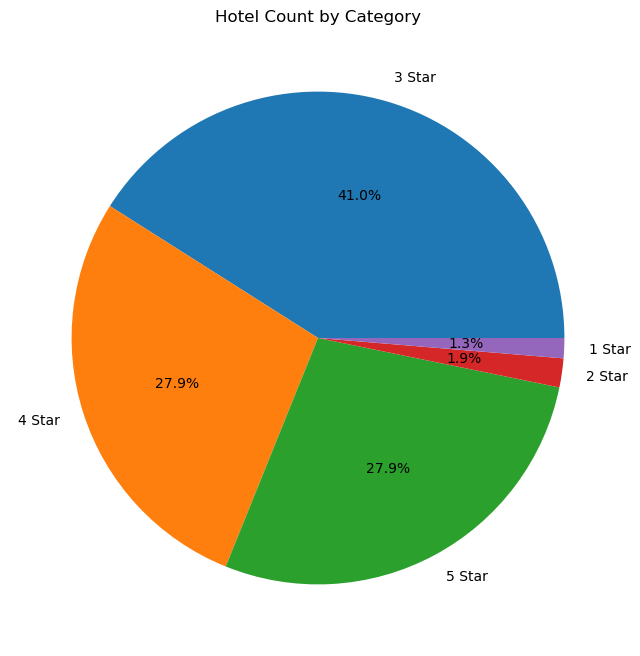

In [14]:
# Pie chart of hotel count by category
plt.figure(figsize=(8, 8))
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Hotel Count by Category')
plt.ylabel('')
plt.show()